### CREATING GEOMAPS WITH SOME STATISTICS FROM OUR DATASET

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./preprocessed_data.csv',low_memory=False)

In [2]:
df = df.sort_values(by='damage_property',ascending=False).reset_index(drop=True)
#del df['index']

In [3]:
df.head(5)

,index,episode_id,event_id,state,event_type,cz_type,event_begin_time,event_end_time,damage_property,damage_crops,...,magnitude_type,tor_f_scale,tor_length,tor_width,event_latitude,event_longitude,deaths,injuries,total_human_damage,DATE
0,1162832,1198567.0,5475650,Louisiana,storm surge/tide,Z,2005-08-29 02:00:00,2005-08-29 17:00:00,2.370069e+10,0.000000,...,NaN,NaN,0.0,0.0,31.411497,-92.241042,0,0,0,2005
1,1619376,131864.0,788675,California,wildfire,Z,2018-11-08 06:33:00,2018-11-25 15:00:00,1.750128e+10,0.000000,...,NaN,NaN,NaN,NaN,36.398102,-119.384761,86,12,98,2018
2,1175734,1199954.0,5477628,Florida,hurricane,Z,2005-10-24 07:00:00,2005-10-24 12:00:00,1.324061e+10,0.000000,...,NaN,NaN,0.0,0.0,29.016986,-82.522836,1,0,1,2005
3,44540,119753.0,720871,Texas,flash flood,C,2017-08-26 22:00:00,2017-08-30 00:00:00,1.054566e+10,10545.656459,...,NaN,NaN,NaN,NaN,32.298647,-98.724766,6,0,6,2017
4,44558,119753.0,720861,Texas,flash flood,C,2017-08-26 21:45:00,2017-08-29 22:00:00,1.054566e+10,105456.564592,...,NaN,NaN,NaN,NaN,32.298647,-98.724766,38,0,38,2017


Σημείωση: Έχοντας δημιουργήσει τη στήλες 'DATE', μπορούμε να δημιουργήσουμε ένα νέο dataframe, το οποίο θα περιλαμβάνει τις εξής πληροφορίες: χρονιά, συνολικός αριθμός τραυματισμών εκείνης της χρονιάς και συνολικός αριθμός θανάτων εκείνης της χρονιάς. Σκοπός μας είναι να παρατηρήσουμε το πως έχει διακυμανθεί, με το πέρασμα των χρόνων, οι τραυματισμοί και η απώλεια ανθρώπινων ζωών λόγω των καιρικών καταστροφών που μελετάμε.

In [4]:
human_damage_each_year = df.groupby('DATE')['injuries','deaths'].sum().reset_index()
human_damage_each_year.sort_values(by='DATE',ascending=True)
human_damage_each_year.head(10)

,DATE,injuries,deaths
0,1950,659,70
1,1951,524,34
2,1952,1916,231
3,1953,5131,519
4,1954,715,36
5,1955,926,129
6,1956,1355,83
7,1957,1976,193
8,1958,535,67
9,1959,734,58


Δημιουργούμε ένα plot σύμφωνα με το παραπάνω dataframe.

In [5]:
human_damage_each_year.plot(kind='line',x='DATE', figsize=(15,10))
# human_damage_each_year.plot(kind='bar',x='year', figsize=(15,10))

Δημιουργούμε ένα dataframe με τη συνολική ζημιά πάνω στις περιουσίες των ανθρώπων και τις ζημίες ανάμεσα στις καλλιεργήσιμες εκτάσεις που καταγράφηκαν κάθε χρόνο.

In [6]:
damage_each_year = df.groupby('DATE')['damage_property','damage_crops'].sum().reset_index()
damage_each_year.sort_values(by='DATE',ascending=True)
damage_each_year.head(10)

,DATE,damage_property,damage_crops
0,1950,3.705594e+08,0.0
1,1951,6.520171e+08,0.0
2,1952,9.176057e+08,0.0
3,1953,5.756666e+09,0.0
4,1954,8.256451e+08,0.0
5,1955,7.974350e+08,0.0
6,1956,1.111585e+09,0.0
7,1957,2.063408e+09,0.0
8,1958,1.154594e+09,0.0
9,1959,7.755509e+08,0.0


Δημιουργούμε ένα plot σύμφωνα με το παραπάνω dataframe.

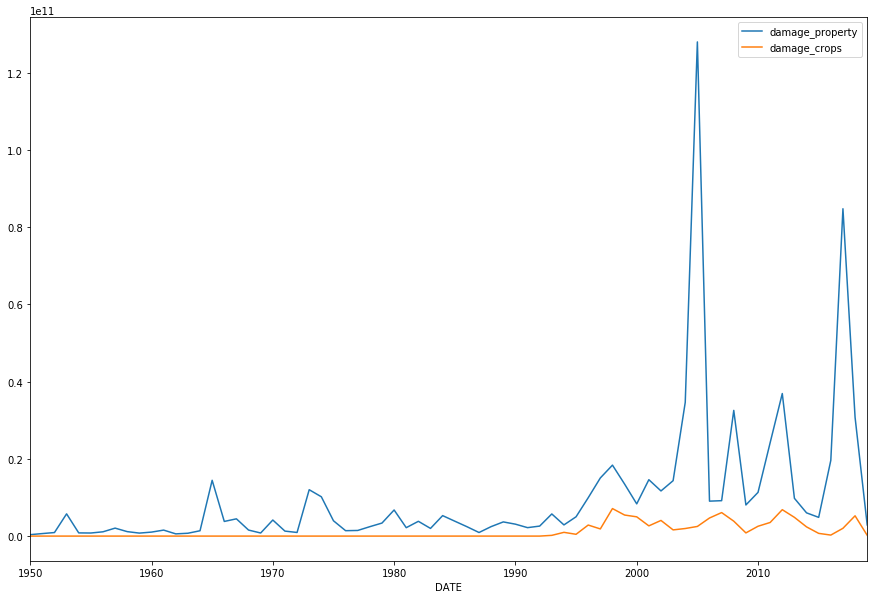

In [7]:
damage_each_year.plot(kind='line',x='DATE', figsize=(15,10))
# damage_each_year.plot(kind='bar',x='year', figsize=(15,10))

Δημιουργούμε τώρα ένα dataframe με τη συνολική ζημιά πάνω στις περιουσίες των ανθρώπων και τις ζημίες ανάμεσα στις καλλιεργήσιμες εκτάσεις.

In [8]:
damage_each_state = df.groupby('state')['damage_property','damage_crops','deaths','injuries'].sum().reset_index()
damage_each_state.sort_values(by='damage_property',ascending=False)

,state,damage_property,damage_crops,deaths,injuries
59,Texas,1.217718e+11,1.652230e+10,1940,23098
32,Louisiana,9.104024e+10,2.433341e+09,1212,3526
13,Florida,6.658761e+10,7.845153e+09,1113,6445
38,Mississippi,4.365258e+10,2.003429e+09,826,7386
44,New jersey,3.200584e+10,1.476239e+08,296,2609
...,...,...,...,...,...
57,St lawrence r,4.311767e+04,0.000000e+00,0,0
26,Lake erie,4.220203e+04,0.000000e+00,0,0
16,Gulf of alaska,4.063107e+04,0.000000e+00,0,0
27,Lake huron,0.000000e+00,0.000000e+00,0,0


In [9]:
long_lat_mean = df.groupby('state')['event_longitude','event_latitude'].sum() / df.groupby('state')['event_longitude','event_latitude'].count()
long_lat_mean

,event_longitude,event_latitude
state,,
Alabama,-86.794329,33.273120
Alaska,-148.691622,62.656039
American samoa,-170.606827,-9.855073
Arizona,-111.818135,33.593247
Arkansas,-92.645165,34.977785
...,...,...
Virginia,-78.658510,37.610194
Washington,-119.355004,47.343790
West virginia,-80.683010,38.781910


In [10]:
damage_each_state = long_lat_mean.merge(damage_each_state,  how='outer', left_on=['state'], right_on = ['state'])
damage_each_state

,state,event_longitude,event_latitude,damage_property,damage_crops,deaths,injuries
0,Alabama,-86.794329,33.273120,1.862084e+10,2.756909e+08,931,9784
1,Alaska,-148.691622,62.656039,5.248398e+08,3.128348e+05,92,127
2,American samoa,-170.606827,-9.855073,2.256566e+08,2.281014e+07,12,36
3,Arizona,-111.818135,33.593247,5.202067e+09,3.504594e+08,325,1417
4,Arkansas,-92.645165,34.977785,9.368088e+09,3.176725e+08,643,6763
...,...,...,...,...,...,...,...
63,Virginia,-78.658510,37.610194,3.568861e+09,9.497900e+08,226,1763
64,Washington,-119.355004,47.343790,1.946229e+09,8.846862e+08,272,1197
65,West virginia,-80.683010,38.781910,1.910380e+09,5.468093e+07,134,408
66,Wisconsin,-89.895524,44.194575,6.785406e+09,1.430028e+09,483,3215


In [11]:
import copy
for_heatmap_df = copy.deepcopy(damage_each_state)
for_heatmap_df['damage_property'] = (for_heatmap_df['damage_property'] -for_heatmap_df['damage_property'].min()) / (for_heatmap_df['damage_property'].max() - for_heatmap_df['damage_property'].min())
for_heatmap_df['damage_crops'] = (for_heatmap_df['damage_crops'] -for_heatmap_df['damage_crops'].min()) / (for_heatmap_df['damage_crops'].max() - for_heatmap_df['damage_crops'].min())
for_heatmap_df['deaths'] = (for_heatmap_df['deaths'] -for_heatmap_df['deaths'].min()) / (for_heatmap_df['deaths'].max() - for_heatmap_df['deaths'].min())
for_heatmap_df['injuries'] = (for_heatmap_df['injuries'] -for_heatmap_df['injuries'].min()) / (for_heatmap_df['injuries'].max() - for_heatmap_df['injuries'].min())
for_heatmap_df = for_heatmap_df.sort_values(by='damage_property',ascending=False).reset_index(drop=True)

In [12]:
for_heatmap_df

,state,event_longitude,event_latitude,damage_property,damage_crops,deaths,injuries
0,Texas,-98.724766,32.298647,1.000000e+00,1.000000,1.000000,1.000000
1,Louisiana,-92.241042,31.411497,7.476300e-01,0.147276,0.624742,0.152654
2,Florida,-82.522836,29.016986,5.468230e-01,0.474822,0.573711,0.279028
3,Mississippi,-89.661581,32.618340,3.584786e-01,0.121256,0.425773,0.319768
4,New jersey,-74.613006,40.319222,2.628346e-01,0.008935,0.152577,0.112954
...,...,...,...,...,...,...,...
63,St lawrence r,-75.577682,44.601082,3.540859e-07,0.000000,0.000000,0.000000
64,Lake erie,-81.758800,41.824855,3.465666e-07,0.000000,0.000000,0.000000
65,Gulf of alaska,-136.812571,57.935462,3.336657e-07,0.000000,0.000000,0.000000
66,Lake huron,-83.380419,44.361721,0.000000e+00,0.000000,0.000000,0.000000


Τώρα θα χωρίσουμε σε κατηγορίες(χρήση bins) τις ζημιές ώστε να δούμε σε τι κατηγορίες ανήκει η κάθε μια. Για παράδειγμα αν έχουμε 7 κατηγορίες , η 7η θα σημαίνει μεγάλη καταστροφή , ενώ η  1 καθόλου ζημιά. 

In [13]:
categorical_damage = copy.deepcopy(for_heatmap_df)

categorical_damage['damage_property'] = pd.cut(categorical_damage['damage_property'],7,labels=["1", "2", "3","4", "5", "6","7"])
categorical_damage['damage_crops'] = pd.cut(categorical_damage['damage_crops'],7,labels=["1", "2", "3","4", "5", "6","7"])
categorical_damage['deaths'] = pd.cut(categorical_damage['deaths'],7,labels=["1", "2", "3","4", "5", "6","7"])
categorical_damage['injuries'] = pd.cut(categorical_damage['injuries'],7,labels=["1", "2", "3","4", "5", "6","7"])

In [14]:
categorical_damage

,state,event_longitude,event_latitude,damage_property,damage_crops,deaths,injuries
0,Texas,-98.724766,32.298647,7,7,7,7
1,Louisiana,-92.241042,31.411497,6,2,5,2
2,Florida,-82.522836,29.016986,4,4,5,2
3,Mississippi,-89.661581,32.618340,3,1,3,3
4,New jersey,-74.613006,40.319222,2,1,2,1
...,...,...,...,...,...,...,...
63,St lawrence r,-75.577682,44.601082,1,1,1,1
64,Lake erie,-81.758800,41.824855,1,1,1,1
65,Gulf of alaska,-136.812571,57.935462,1,1,1,1
66,Lake huron,-83.380419,44.361721,1,1,1,1


#### Μέχρι τώρα έχουμε τα εξής dataframes

categorical_damage -> states , long  , lat , categorical values for damage columns

for_heatmap_df - > states,long,lat  damage columns scaled to 0-1 values for heatmap

damage_each_state-> states , long,lat damage columns with real values


__Γεωγραφικός χάρτης με τις ζημιές περιουσιών.__

In [15]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from IPython.display import HTML, display

In [16]:
colors_damage = {7:'darkred' , 6:'lightred' , 5:'red' , 4:'orange' , 3:'yellow' , 2:'blue' , 1: 'green'}

m = folium.Map(location=[30, 20], zoom_start=3)

for s,x,y,z,usd in zip(categorical_damage['state'],categorical_damage['event_latitude'],categorical_damage['event_longitude'], categorical_damage['damage_property'],damage_each_state['damage_property']):
    folium.Circle(radius=z*5,
                  location=[x,y],
                  color = colors_damage[int(z)],
                  popup='state : {0}, magnitude of damage properties: {1}, total usd: {2}'.format(s,z,usd),
                  fill=True).add_to(m)

display(m)

__Γεωγραφικός χάρτης με τις ζημιές καλλιεργήσιμων εκτάσεων__

In [17]:
colors_damage = {7:'darkred' , 6:'lightred' , 5:'red' , 4:'orange' , 3:'yellow' , 2:'blue' , 1: 'green'}

m = folium.Map(location=[30, 20], zoom_start=3)

for s,x,y,z,usd in zip(categorical_damage['state'],categorical_damage['event_latitude'],categorical_damage['event_longitude'], categorical_damage['damage_crops'],damage_each_state['damage_crops']):
    folium.Circle(radius=z*5,
                  location=[x,y],
                  color = colors_damage[int(z)],
                  popup='state : {0}, magnitude of damage crops: {1}, total usd: {2}'.format(s,z,usd),
                  fill=True).add_to(m)

display(m)

__Γεωγραφικός χάρτης με τους νεκρούς ανά state__

In [18]:
colors_damage = {7:'darkred' , 6:'lightred' , 5:'red' , 4:'orange' , 3:'yellow' , 2:'blue' , 1: 'green'}

m = folium.Map(location=[30, 20], zoom_start=3)

for s,x,y,z,usd in zip(categorical_damage['state'],categorical_damage['event_latitude'],categorical_damage['event_longitude'], categorical_damage['deaths'],damage_each_state['deaths']):
    folium.Circle(radius=z*5,
                  location=[x,y],
                  color = colors_damage[int(z)],
                  popup='state : {0}, level of human disaster: {1}, total deaths: {2}'.format(s,z,usd),
                  fill=True).add_to(m)

display(m)

__Γεωγραφικός χάρτης με τραυματίες ανά state__

In [19]:
colors_damage = {7:'darkred' , 6:'lightred' , 5:'red' , 4:'orange' , 3:'yellow' , 2:'blue' , 1: 'green'}

m = folium.Map(location=[30, 20], zoom_start=3)

for s,x,y,z,usd in zip(categorical_damage['state'],categorical_damage['event_latitude'],categorical_damage['event_longitude'], categorical_damage['injuries'],damage_each_state['injuries']):
    folium.Circle(radius=z*5,
                  location=[x,y],
                  color = colors_damage[int(z)],
                  popup='state : {0}, level of human disaster: {1}, total injuries: {2}'.format(s,z,usd),
                  fill=True).add_to(m)

display(m)

__Παρακάτω ακολουθούν heatmaps με τα damage properties και τα damage crops__

In [20]:
m2 = folium.Map(location=[30, 20], zoom_start=3)
m2.add_child(HeatMap(zip(for_heatmap_df['event_latitude'],
                           for_heatmap_df['event_longitude'], 
                           for_heatmap_df['damage_property']),
                           min_opacity = 0.5,radius=20))
FastMarkerCluster(data=list(zip(for_heatmap_df['event_longitude'].values, for_heatmap_df['event_latitude'].values))).add_to(m)
folium.LayerControl().add_to(m2)

display(m2)


In [21]:
m2 = folium.Map(location=[30, 20], zoom_start=3)
m2.add_child(HeatMap(zip(for_heatmap_df['event_latitude'],
                           for_heatmap_df['event_longitude'], 
                           for_heatmap_df['damage_crops']),
                           min_opacity = 0.5,radius=20))
FastMarkerCluster(data=list(zip(for_heatmap_df['event_longitude'].values, for_heatmap_df['event_latitude'].values))).add_to(m)
folium.LayerControl().add_to(m2)

display(m2)


### Παρακάτω θα δούμε τη συχνότητα συγκεκριμένων φαινομένων ανά πολιτεία. Το ένα φαινόμενο θα είναι το tornado, το οποίο είναι αυτό με τις μεγαλύτερες ανθρώπινες απώλειες και τραυματισμούς, ενώ το άλλο είναι το flood με τις μεγαλύτερες οικονομικές συνέπειες.

Παρακάτω ακολουθεί ένα mapping κλάσεων event_type για να είναι πιο μαζεμένα.

In [22]:
newdf = copy.deepcopy(df)

Σηημείωση: Μπορούμε και πάλι να δημιουργήσουμε ένα dataframe στο οποίο θα καταγράψουμε το συνολικό αριθμό των events που καταγράφηκαν ανά έτος, καθώς και συγκεκριμένα το πόσες φορές εμφανίστηκαν οι 3 πιο συχνές καιρικές καταστροφές.

In [23]:
l_events_each_year = []
for i in range(1950, 2019):
    df_temp = newdf[newdf['DATE'] == i]
    thunderstorm_temp = df_temp[df_temp['event_type'] == 'thunderstorm wind']
    hail_temp = df_temp[df_temp['event_type'] == 'hail']
    tornado_temp = df_temp[df_temp['event_type'] == 'tornado']
    l_events_each_year.append({'year': i, 'events': len(df_temp.index), 'thunderstorm wind': len(thunderstorm_temp), 
                               'hail': len(hail_temp), 'tornado': len(tornado_temp)})
events_each_year = pd.DataFrame(l_events_each_year)
events_each_year.head(10)

,year,events,thunderstorm wind,hail,tornado
0,1950,223,0,0,223
1,1951,269,0,0,269
2,1952,272,0,0,272
3,1953,492,0,0,492
4,1954,609,0,0,609
5,1955,1413,421,360,632
6,1956,1703,735,401,567
7,1957,2184,775,479,930
8,1958,2213,899,706,608
9,1959,1813,652,531,630


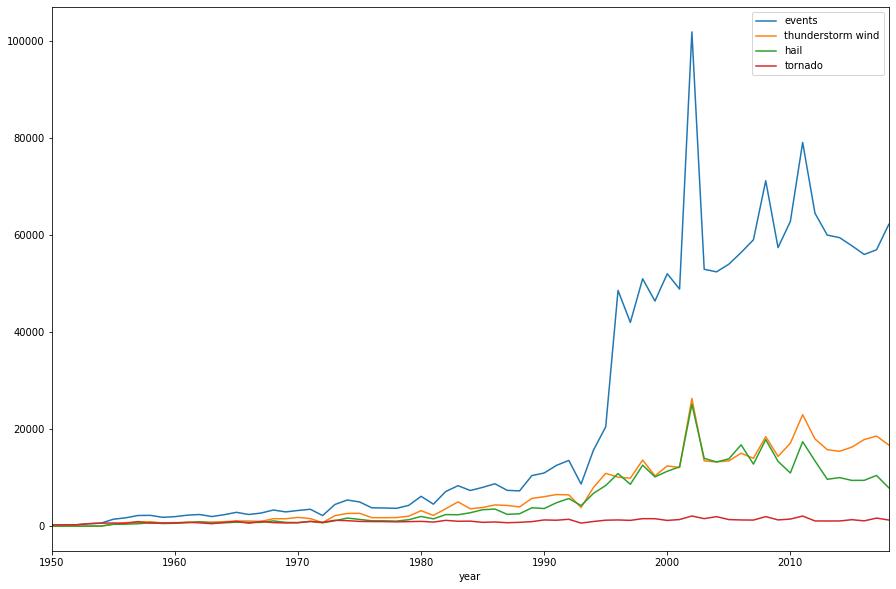

In [24]:
events_each_year.plot(kind='line',x='year', figsize=(15,10))
# events_each_year.plot(kind='bar',x='year', figsize=(15,10))

Δημιουργούμε pivot table με state και κάθε είδος event_type που έχουμε παραθέτοντας τη συχνότητα των event type ανά πολιτεία.

In [25]:
table = pd.pivot_table(newdf[['state','event_type']],index=['state'],columns=['event_type'],aggfunc=lambda x: x.count())
table.columns =  table.columns.droplevel(0)
table =  table.loc[:,~table.columns.duplicated()]
#table.columns
table.fillna(0,inplace=True) # replace nan with 0


mytable = long_lat_mean.merge(table,  how='outer', left_on=['state'], right_on = ['state'])
mytable = mytable.reset_index()
mytable

,state,event_longitude,event_latitude,astronomical low tide,cold/wind chill,debris flow,dense fog,drought,dust devil,excessive heat,...,storm,storm surge/tide,thunderstorm wind,tornado,tropical depression,tropical storm,wildfire,wind,winter storm,winter weather
0,Alabama,-86.794329,33.273120,0.0,266.0,1.0,7.0,2812.0,6.0,38.0,...,0.0,19.0,14893.0,2624.0,89.0,246.0,10.0,646.0,434.0,415.0
1,Alaska,-148.691622,62.656039,3.0,137.0,4.0,0.0,35.0,5.0,0.0,...,0.0,55.0,11.0,3.0,0.0,0.0,49.0,3749.0,490.0,35.0
2,American samoa,-170.606827,-9.855073,0.0,0.0,3.0,0.0,16.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,9.0,0.0,35.0,0.0,0.0
3,Arizona,-111.818135,33.593247,0.0,14.0,5.0,80.0,372.0,25.0,161.0,...,477.0,0.0,3067.0,255.0,0.0,1.0,199.0,720.0,307.0,29.0
4,Arkansas,-92.645165,34.977785,0.0,32.0,0.0,3.0,2418.0,3.0,422.0,...,7.0,0.0,14618.0,2275.0,115.0,110.0,177.0,482.0,1173.0,1631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Virginia,-78.658510,37.610194,0.0,273.0,8.0,1286.0,1753.0,7.0,163.0,...,0.0,18.0,15346.0,846.0,0.0,149.0,40.0,2084.0,3260.0,3682.0
64,Washington,-119.355004,47.343790,7.0,32.0,109.0,9.0,79.0,8.0,21.0,...,60.0,17.0,517.0,123.0,0.0,0.0,388.0,1909.0,190.0,257.0
65,West virginia,-80.683010,38.781910,0.0,796.0,6.0,412.0,1130.0,1.0,410.0,...,0.0,0.0,5621.0,160.0,0.0,0.0,32.0,1608.0,1105.0,1914.0
66,Wisconsin,-89.895524,44.194575,0.0,858.0,0.0,1652.0,2032.0,9.0,151.0,...,0.0,0.0,11244.0,1575.0,0.0,0.0,22.0,2058.0,2968.0,2333.0


In [26]:
#table.loc['Louisiana'].plot.bar()

https://rpubs.com/JackHo/Y16M02D21 -> ανάλυση που δείχνει πως τα tornado και τα flood είναι αυτά με τις μεγαλύτερες ανθρώπινες απώλειες και οικονομικές επιπτώσεις αντίστοιχα.

In [27]:
toplot = mytable[['state','flood','tornado','event_latitude','event_longitude']]
toplot

,state,flood,tornado,event_latitude,event_longitude
0,Alabama,446.0,2624.0,33.273120,-86.794329
1,Alaska,461.0,3.0,62.656039,-148.691622
2,American samoa,140.0,0.0,-9.855073,-170.606827
3,Arizona,277.0,255.0,33.593247,-111.818135
4,Arkansas,1327.0,2275.0,34.977785,-92.645165
...,...,...,...,...,...
63,Virginia,2566.0,846.0,37.610194,-78.658510
64,Washington,506.0,123.0,47.343790,-119.355004
65,West virginia,1173.0,160.0,38.781910,-80.683010
66,Wisconsin,1201.0,1575.0,44.194575,-89.895524


Map with tornado frequence by state

In [28]:
m = folium.Map(location=[30, 20], zoom_start=3)

for s,x,y,z in zip(toplot['state'],toplot['event_latitude'],toplot['event_longitude'], toplot['tornado']):
    folium.Circle(radius=z*21,
                  location=[x,y],
                  color = 'red',
                  popup ='state : {0},no. of tornadoes: {1}'.format(s,z),
                  fill=True).add_to(m)

display(m)

map with flood frequence by state

In [29]:
m = folium.Map(location=[30, 20], zoom_start=3)

for s,x,y,z in zip(toplot['state'],toplot['event_latitude'],toplot['event_longitude'], toplot['flood']):
    folium.Circle(radius=z*21,
                  location=[x,y],
                  color = 'blue',
                  popup ='state : {0},no. of floods: {1}'.format(s,z),
                  fill=True).add_to(m)

display(m)